<a href="https://colab.research.google.com/github/FariqJavier/Text-Classification-Model/blob/main/NLP_pre_Trained_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Using IndoNLU Emot dataset for sentiment analysis task
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

test_url = 'https://raw.githubusercontent.com/indoNLP/indonlu/master/dataset/emot_emotion-twitter/test_preprocess.csv'
train_url = 'https://raw.githubusercontent.com/indoNLP/indonlu/master/dataset/emot_emotion-twitter/train_preprocess.csv'
val_url = 'https://raw.githubusercontent.com/indoNLP/indonlu/master/dataset/emot_emotion-twitter/valid_preprocess.csv'

In [ ]:
train_df = pd.read_csv(train_url)
val_df = pd.read_csv(val_url)
test_df = pd.read_csv(test_url)

In [ ]:
train_df.head()

,label,tweet
0,happy,Ini adalah hal yang paling membahagiakan saat ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...
2,fear,yaudah kalo emang belum berani potong rambut p...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha..."
4,anger,temen2 masa kecil yang turned out being asshol...


In [ ]:
val_df.head()

,label,tweet
0,anger,[USERNAME] jaringannya mati ya? Tidak bisa dib...
1,anger,It's like a circle of stupidity. Atlit gak diu...
2,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3,happy,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
4,happy,"Di hari ini, yap tepat di tanggal 23 juli dima..."


In [ ]:
test_df.head()

,label,tweet
0,love,Pixy ini kok lama-lama gemesim yaaaa. Setelah ...
1,fear,Penyakit hepatitis B 100x lebih infeksius dari...
2,fear,[USERNAME] [USERNAME] [USERNAME] Gw lebih khaw...
3,anger,Kemerdekaan adalah hak segala bangsa ...( Kec ...
4,happy,"Selamat pak [USERNAME] resmi jadi bapak, seked..."


In [ ]:
print(len(train_df), 'train examples')
print(len(val_df), 'validation examples')
print(len(test_df), 'test examples')

3521 train examples
440 validation examples
440 test examples


In [ ]:
train_df['tweet']

0       Ini adalah hal yang paling membahagiakan saat ...
1       [USERNAME] [USERNAME] Dari pertama [USERNAME] ...
2       yaudah kalo emang belum berani potong rambut p...
3       Jadi semalam, gw rekap, eh intinya yg gw usaha...
4       temen2 masa kecil yang turned out being asshol...
                              ...                        
3516    [USERNAME] [USERNAME] Bcs doi w anak pelayaran...
3517    Sekali , dua kali , tiga kali , lama2 bosan ju...
3518    [USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3519    Aku takut tulisan ini terbaca di saat kamu ngg...
3520     alhamdulilah tmksh tiara u to cantik dart ava oy
Name: tweet, Length: 3521, dtype: object

In [ ]:
train_df['label']

0       happy
1       anger
2        fear
3        fear
4       anger
        ...  
3516     fear
3517    anger
3518    anger
3519     fear
3520    happy
Name: label, Length: 3521, dtype: object

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

Dataset URL: https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text
License(s): CC-BY-NC-SA-4.0
  0% 0.00/814k [00:00<?, ?B/s]
100% 814k/814k [00:00<00:00, 116MB/s]


In [ ]:
!kaggle datasets download -d oswinrh/indonesian-stoplist

Dataset URL: https://www.kaggle.com/datasets/oswinrh/indonesian-stoplist
License(s): unknown
  0% 0.00/2.27k [00:00<?, ?B/s]
100% 2.27k/2.27k [00:00<00:00, 2.96MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/indonesian-abusive-and-hate-speech-twitter-text.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

with zipfile.ZipFile('/content/indonesian-stoplist.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
slang_dict = pd.read_csv('../content/new_kamusalay.csv', encoding='latin-1', header=None)
slang_dict = slang_dict.rename(columns={0: 'original',
                                      1: 'replacement'})

In [ ]:
id_stopword_dict = pd.read_csv('../content/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})
stopwords_new = pd.DataFrame(['sih','nya', 'iya', 'nih', 'biar', 'tau', 'kayak', 'banget'], columns=['stopword'])
id_stopword_dict = pd.concat([id_stopword_dict,stopwords_new]).reset_index()
id_stopword_dict = pd.DataFrame(id_stopword_dict['stopword'])

In [ ]:
def normalize_slang(text):
    slang_dict_map = dict(zip(slang_dict['original'], slang_dict['replacement']))
    return ' '.join([slang_dict_map[word] if word in slang_dict_map else word for word in text.split(' ')])

In [ ]:
import re

In [ ]:
def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

In [ ]:
# Define the preprocessing function
def preprocess_feature(tweet):
    # Lowercase
    tweet = tweet.lower()

    # # Remove URLs
    # tweet = re.sub(r'\[URL\]', '', tweet, flags=re.MULTILINE)

    # Menghapus token [USERNAME]
    tweet = re.sub(r'username', '', tweet)

    # Menambahkan spasi setelah tanda baca jika tidak ada
    tweet = re.sub(r'([.,!?])([^ \n])', r'\1 \2', tweet)

    # Remove punctuations
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

    tweet = normalize_slang(tweet)

    tweet = remove_stopword(tweet)

    # Mengganti spasi ganda atau lebih dengan satu spasi
    tweet = re.sub(r'\s+', ' ', tweet)

    # Menghapus spasi di awal dan akhir teks
    tweet = tweet.strip()

    return (tweet)

In [ ]:
# Define the preprocessing function
def preprocess_label(label):
    # Lowercase
    label = label.lower()

    label_mapping = {'anger': 0, 'fear': 1, 'happy': 2, 'love': 3, 'sadness': 4}

    # Check if the label exists in the mapping, otherwise keep it unchanged
    return label_mapping.get(label, label)

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()

    # Use Pandas dataframe's pop method to get the list of targets.
    labels = dataframe.pop('label') # YOUR CODE HERE

    for column in dataframe:
      dataframe[column] = dataframe[column].map(preprocess_feature)

    labels =  labels.map(preprocess_label)

    # Create a tf.data.Dataset from the dataframe and labels.
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) # YOUR CODE HERE

    if shuffle:
        # Shuffle dataset.
        ds = ds.shuffle(buffer_size=len(dataframe)) # YOUR CODE HERE

    # Batch dataset with specified batch_size parameter.
    ds = ds.batch(batch_size) # YOUR CODE HERE

    return ds

In [ ]:
tweet_df = train_df['tweet'].apply(preprocess_feature)

In [ ]:
train_tweet = list(train_df['tweet'].apply(preprocess_feature))
train_label = list(train_df['label'].apply(preprocess_label))

val_tweet = list(val_df['tweet'].apply(preprocess_feature))
val_label = list(val_df['label'].apply(preprocess_label))

test_tweet = list(test_df['tweet'].apply(preprocess_feature))
test_label = list(test_df['label'].apply(preprocess_label))

In [ ]:
import random

In [ ]:
# train_tweet_and_label = list(zip(train_tweet, train_label))

# random.seed(42)
# train_tweet_and_label = random.sample(train_tweet_and_label, len(train_tweet_and_label))

# # Unpack back into separate lists
# train_tweet, train_label = zip(*train_tweet_and_label)

In [ ]:
print(len(train_tweet))
print(len(train_label))
print(len(val_tweet))
print(len(val_label))
print(len(test_tweet))
print(len(test_label))

3521
3521
440
440
440
440


In [ ]:
train_df['tweet'][1]

'[USERNAME] [USERNAME] Dari pertama [USERNAME] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.Coba tanya Kenapa [USERNAME] ? Abdi rakyat butuh seoran'

In [ ]:
train_tweet[:2]

['membahagiakan biasku foto elf returnofthelittleprince happyheechulday',
 'menduduki bangku jabatan rakyat mendengar hasil kerja prestasi nyata menduduki bangku jabatan coba abdi rakyat butuh seoran']

In [ ]:
train_df['label'][:2]

0    happy
1    anger
Name: label, dtype: object

In [ ]:
train_label[:2]

[2, 0]

In [ ]:
# batch_size = 16 # A small batch sized is used for demonstration purposes
# train_ds = df_to_dataset(train_df, batch_size=batch_size)
# val_ds = df_to_dataset(val_df, shuffle=False, batch_size=batch_size)
# test_ds = df_to_dataset(test_df, shuffle=False, batch_size=batch_size)

In [ ]:
# for feature_batch, label_batch in train_ds.take(1):
#     print('Every feature:', list(feature_batch.keys()))
#     print('A batch of tweet:', feature_batch['tweet'])
#     print('A batch of label', label_batch )

In [ ]:
max_length = 120
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_tweet)
word_index = tokenizer.word_index
vocab_size = len(word_index)

# Generate and pad the training sequences
train_sequences = tokenizer.texts_to_sequences(train_tweet)
train_padded = pad_sequences(train_sequences,maxlen=max_length, truncating=trunc_type, padding=pad_type)

# Generate and pad the validation sequences
val_sequences = tokenizer.texts_to_sequences(val_tweet)
val_padded = pad_sequences(val_sequences,maxlen=max_length, truncating=trunc_type, padding=pad_type)

In [ ]:
print(len(word_index))
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

14105
<OOV> token included in vocabulary


In [ ]:
print(f"Padded and truncated training sequences have shape: {train_padded.shape}")
print(f"Padded and truncated validation sequences have shape: {val_padded.shape}")

Padded and truncated training sequences have shape: (3521, 120)
Padded and truncated validation sequences have shape: (440, 120)


In [ ]:
import numpy as np

In [ ]:
train_label = np.array(train_label)
val_label = np.array(val_label)

In [ ]:
# # set our text file's location path
# fasttext_path = r'/content/twitt_indo_fasttext.txt'

# # convert the train_tweet dataframe to text file
# train_tweet.to_csv(fasttext_path, header=None, index=False)

In [ ]:
!# Step 1: Download the Indonesian FastText Vectors
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz

# Step 2: Unzip the file
!gunzip cc.id.300.vec.gz

# Step 3: Install the fasttext library
!pip install fasttext

--2024-06-01 11:11:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.108, 3.163.189.14, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227018698 (1.1G) [binary/octet-stream]
Saving to: ‘cc.id.300.vec.gz’

cc.id.300.vec.gz    100%[===================>]   1.14G   233MB/s    in 5.1s    

2024-06-01 11:11:30 (231 MB/s) - ‘cc.id.300.vec.gz’ saved [1227018698/1227018698]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227139 sha256=6f82f66446dc46fef606fe077b2e1e2b3f7918049789bf1090e7594cc30d3088
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8

In [ ]:
# Step 4: Load and use the vectors
import fasttext

# Step 4: Load the FastText vectors from the .vec file
embedding_index = {}
with open('cc.id.300.vec', 'r', encoding='utf-8') as f:
    # Skip the first line if it contains the number of vectors and dimensions
    next(f)
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

In [ ]:
test_word = 'membahagiakan'

test_vector = embedding_index[test_word]

print(f"Vector representation of word {test_word} looks like this:\n\n{test_vector}")

Vector representation of word membahagiakan looks like this:

[-7.30e-03 -5.28e-02  7.10e-03  3.02e-02 -5.44e-02 -3.73e-02 -2.69e-02
 -3.22e-02 -1.29e-02 -4.03e-02  1.62e-02  2.15e-02 -6.20e-03  2.04e-02
 -1.00e-04 -1.33e-02 -1.21e-02 -3.00e-03  1.52e-02  2.65e-02  1.70e-03
  1.32e-02 -7.80e-03  2.70e-02 -2.45e-02 -6.00e-03 -1.46e-02  2.60e-03
  2.29e-02 -4.33e-02 -1.97e-02 -7.10e-03  5.00e-02 -2.65e-02 -5.00e-03
  2.79e-02 -1.42e-02  1.19e-02  1.09e-02  1.48e-02  2.35e-02 -7.00e-04
 -5.50e-03  3.23e-02  9.80e-03  2.62e-02  2.28e-02  4.00e-03 -2.61e-02
  1.14e-02  6.00e-04 -1.85e-02 -2.00e-03  1.90e-03 -1.14e-02  1.19e-02
  5.07e-02 -3.30e-03 -2.40e-03  6.00e-03 -1.38e-02  2.72e-02  2.03e-02
  1.35e-02 -2.11e-02  1.24e-02  1.88e-02  1.61e-02 -2.00e-03 -1.33e-02
  1.08e-02  4.72e-02  5.50e-03 -1.90e-03 -1.73e-02 -2.83e-02 -2.80e-03
  1.81e-02 -5.80e-03 -1.32e-02  2.43e-02 -1.14e-02 -2.28e-02  2.40e-02
 -9.30e-03  2.60e-03 -2.84e-02  7.00e-03  2.75e-02 -2.92e-02  8.40e-03
  1.25e-02  2.9

In [ ]:
print(f"Each word vector has shape: {test_vector.shape}")

Each word vector has shape: (300,)


In [ ]:
# Define embedding dimensions (usually 300 for FastText vectors)
embedding_dim = 300

# Step 3: Initialize an empty numpy array with the appropriate size
EMBEDDINGS_MATRIX = np.zeros((len(word_index) + 1, embedding_dim))

# Step 5: Populate the EMBEDDINGS_MATRIX
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector

In [ ]:
print("Embeddings matrix shape:", EMBEDDINGS_MATRIX.shape)

Embeddings matrix shape: (14106, 300)


In [ ]:
# Build the model
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[EMBEDDINGS_MATRIX], trainable=False),
        tf.keras.layers.Dropout(0.3),
        # tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        # tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 300)          4231800   
                                                                 
 dropout (Dropout)           (None, 120, 300)          0         
                                                                 
 bidirectional (Bidirection  (None, 120, 128)          186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
# Train the model and save the training history
history = model.fit(train_padded, train_label, epochs=20, validation_data=(val_padded, val_label))

Epoch 1/20
111/111 [==============================] - 118s 783ms/step - loss: 1.4047 - accuracy: 0.3888 - val_loss: 1.2253 - val_accuracy: 0.4659
Epoch 2/20
111/111 [==============================] - 75s 674ms/step - loss: 1.1246 - accuracy: 0.5578 - val_loss: 1.0811 - val_accuracy: 0.5864
Epoch 3/20
111/111 [==============================] - 62s 563ms/step - loss: 1.0322 - accuracy: 0.5995 - val_loss: 1.0814 - val_accuracy: 0.5614
Epoch 4/20
111/111 [==============================] - 81s 728ms/step - loss: 0.9675 - accuracy: 0.6348 - val_loss: 1.0234 - val_accuracy: 0.5909
Epoch 5/20
111/111 [==============================] - 74s 662ms/step - loss: 0.9351 - accuracy: 0.6561 - val_loss: 1.0692 - val_accuracy: 0.5955
Epoch 6/20
111/111 [==============================] - 69s 624ms/step - loss: 0.9006 - accuracy: 0.6643 - val_loss: 1.0607 - val_accuracy: 0.5795
Epoch 7/20
111/111 [==============================] - 72s 652ms/step - loss: 0.8761 - accuracy: 0.6751 - val_loss: 1.0088 - val_a

In [ ]:
import matplotlib.pyplot as plt

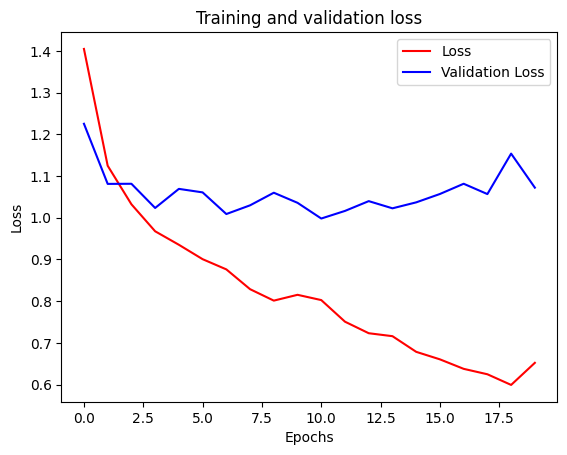

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = [*range(20)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

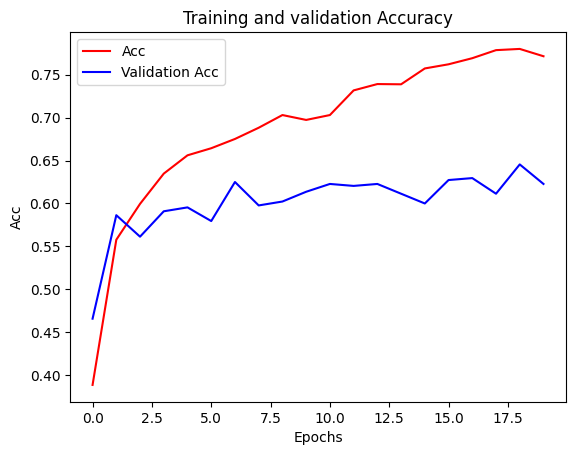

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = [*range(20)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Acc", "Validation Acc"])
plt.show()